In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_input = pd.read_csv('Credit_Risk_Train_Data.csv')
validate_input = pd.read_csv('Credit_Risk_Validate_Data.csv')

In [ ]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [ ]:
# the last columns has different name on both
# Lets make name same.and then merge together
# so that we can fill the missing values simulteneously

validate_input.rename(columns={'outcome':'Loan_Status'}, inplace=True)

In [ ]:
data_all = pd.concat([train_input,validate_input], ignore_index = True)
data_all.shape

(981, 13)

In [ ]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


# Exploratory Data Analysis

In [ ]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


## Missing Value Processing

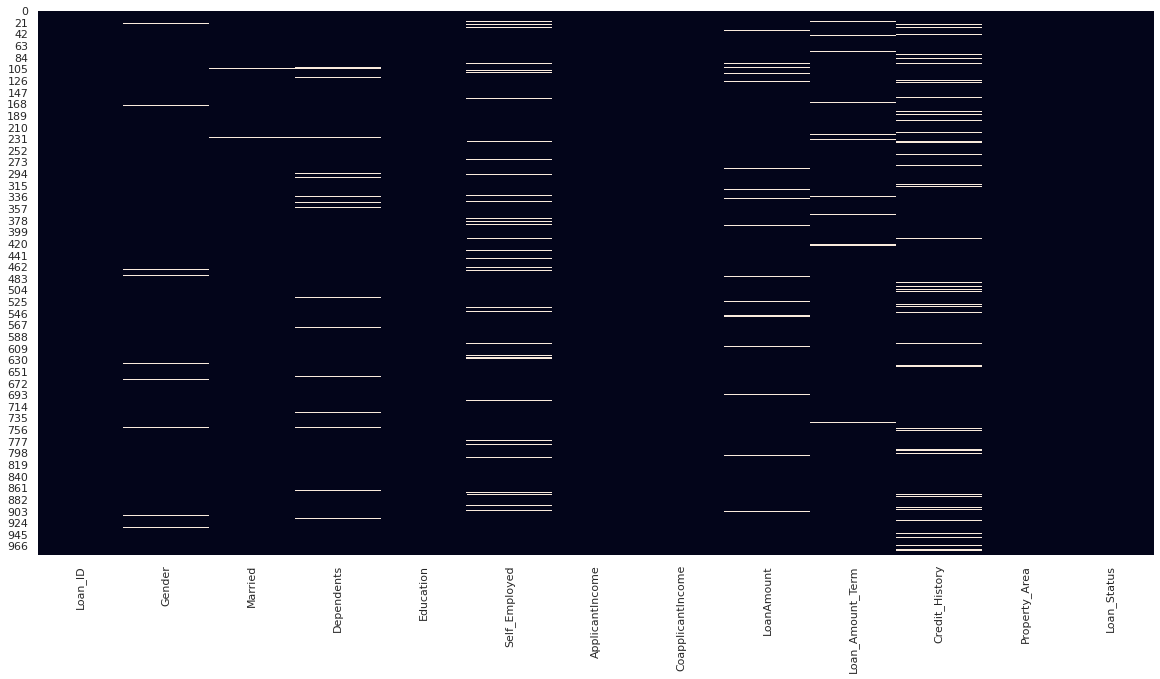

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_all.isnull(), cbar=False)

In [ ]:
data_all.isnull().sum() #gives the missing value of all columns

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

### NaN Fill with Mode

In [ ]:
Counter(data_all['Gender'])

Counter({'Female': 182, 'Male': 775, nan: 24})

In [ ]:
data_all.fillna({'Gender':'Male'}, inplace=True)

In [ ]:
#Check if filled
Counter(data_all['Gender'])

Counter({'Female': 182, 'Male': 799})

In [ ]:
# Lets fill married now
print(Counter(data_all['Married'])) #most are married

Counter({'Yes': 631, 'No': 347, nan: 3})


In [ ]:
data_all.fillna({'Married':'Yes'}, inplace=True)

In [ ]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

### NaN fill with Crosstab

In [ ]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [ ]:
data_all['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
# lets see thee dependents wrt Marrige
pd.crosstab(data_all['Married'],data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [ ]:
# For bachelors, lets fill the missing dependents as 0
# lets find the index of all rows with Dependents missing and Married No
bachelor_nulldependent = data_all[(data_all['Married']=="No") & 
                                  (data_all['Dependents'].isnull())].index.tolist()
print(bachelor_nulldependent)                                  

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [ ]:
data_all['Dependents'].iloc[bachelor_nulldependent]='0'

In [ ]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [ ]:
# For the remaining 16 missing dependents,
# lets see how many dependets have Male & Female have
pd.crosstab(data_all['Gender'], data_all["Dependents"])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [ ]:
# lets see the gender of 16 missing dependents
pd.crosstab(data_all['Gender'], data_all['Dependents'].isnull())

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


In [ ]:
pd.crosstab((data_all['Gender']=='Male')& (data_all['Married']=="Yes"), data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [ ]:
# lets fill the dependets with 1
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()].index.tolist()]="1"

In [ ]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [ ]:
data_all.fillna({'Self_Employed':'No'}, inplace=True)

In [ ]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

### NaN fill with Mean

In [ ]:
# To check if any row with both LoanAmount and Loan_amount_Term as Nan
pd.crosstab(data_all['LoanAmount'].isnull(),
            data_all['Loan_Amount_Term'].isnull())

NameError: ignored

In [ ]:
pd.crosstab(data_all['LoanAmount'].isnull(),data_all['Loan_Amount_Term'])

In [ ]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

In [ ]:
#Lets fill the missing values in LoanAmount
#With mean of the respective Loan_term
# we see that 180& 240 has alomost same loan amount 128-131%& 360 has high I.e 144
#and all remaining by 130
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
&(data_all['Loan_Amount_Term']==360)]=144

data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
& (data_all['Loan_Amount_Term']==480)]=137

In [ ]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())]=130

In [ ]:
#Lets Fill Loan Amount Term
(data_all['Loan_Amount_Term']).value_counts()

In [ ]:
#lets fill the loan Tenure by mode i,e 360
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]=360

In [ ]:
data_all.isnull().sum()

In [ ]:
data_all['Credit_History'].value_counts()

In [ ]:
pd.crosstab(data_all['Gender'],data_all['Credit_History'])
# gender makes no difference

In [ ]:
pd.crosstab(data_all['Self_Employed'],data_all['Credit_History'])
# Self_Emplyed_makes No Differnece

In [ ]:
pd.crosstab(data_all['Education'],data_all['Credit_History'])
# Educatiion makes No difference

In [ ]:
pd.crosstab(data_all['Married'],data_all['Credit_History'])
# married makes no difference

In [ ]:
data_all.fillna({'Credit_History':1},inplace=True)

In [ ]:
data_all.isnull().sum()

## Categorical feature Engineering

In [ ]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_all['Dependents'].value_counts()

0     554
1     176
2     160
3+     91
Name: Dependents, dtype: int64

In [ ]:
data_all['Dependents'][data_all['Dependents']=='3+']='3'

In [ ]:
data_all['Dependents'].value_counts()

0    554
1    176
2    160
3     91
Name: Dependents, dtype: int64

In [ ]:
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [ ]:
data_all['Dependents']= data_all['Dependents'].astype(int)
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [ ]:
data_all_new = pd.get_dummies(data_all.drop(['Loan_ID'],axis=1),
                              drop_first=True)

In [ ]:
data_all_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [ ]:
X =  data_all_new.drop(['Loan_Status_Y'],axis=1)
y = data_all_new['Loan_Status_Y']

In [ ]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

## Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_test.shape

(246, 12)

In [ ]:
X_train.shape

(735, 12)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Fit only the training data
scaler.fit(X)

StandardScaler()

In [ ]:
# Now apply rransformation to tha data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:5]

array([[-0.76421042, -0.31161849,  1.03595253, -0.25556156,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985,  1.87082869, -0.37155221,
         1.34569248, -0.73158135],
       [-0.76421042, -0.1528047 , -0.5895062 , -0.1638335 ,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
         1.34569248, -0.73158135],
       [-0.76421042, -0.44162092,  0.99289646, -0.28176958,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
        -0.74311183, -0.73158135],
       [ 0.2106796 , -0.26840146, -0.5895062 , -0.6224738 ,  0.2705276 ,
         0.42151046, -2.09525891, -1.35169869, -0.53452248, -0.37155221,
         1.34569248, -0.73158135],
       [-0.76421042, -0.23098184,  0.01401481,  0.01962262,  0.2705276 ,
         0.42151046,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
        -0.74311183, -0.73158135]])

### Training the model using KNN 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters = {'n_neighbors': [3,5,11,19],
              'weights'    : ['uniform','distance'],
              'metric'     : ['minkowski', 'manhattam']}

In [ ]:
clf = GridSearchCV(KNeighborsClassifier(),parameters, cv=3,
                   verbose=1, n_jobs = -1)

In [ ]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattam'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
clf.best_score_

0.8462585034013607

In [ ]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}

In [ ]:
clf = KNeighborsClassifier(metric='minkowski',n_neighbors= 19, weights= 'uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 37,  30],
       [  4, 175]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8617886178861789

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.55      0.69        67
           1       0.85      0.98      0.91       179

    accuracy                           0.86       246
   macro avg       0.88      0.76      0.80       246
weighted avg       0.87      0.86      0.85       246

